# Spam Classifier

### Extract, transform and load data

In [3]:
import pandas as pd
import numpy as np
import re
raw = pd.read_csv('spam.csv', delimiter = ',', encoding='latin-1')
raw.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop useless columns and NaN values

In [4]:
raw.drop(['Unnamed: 2' ,'Unnamed: 3' ,'Unnamed: 4'], axis=1, inplace=True)
raw = raw.dropna(how='any',axis=0)# drop Nan rows
raw.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Creating the columns of our desired dataset

In [5]:
columns=[]
rows = []
y = list(raw.v1)#lo usaremos luego
for i in range (0,len(raw.v2)):
    try:
        rows.append(re.sub("[^\w]", " ",  raw.v2[i]).lower().split())
        columns = columns + re.sub("[^\w]", " ",  raw.v2[i]).lower().split()
    except:
        print('Error in:' ,raw.v2[i])

In [6]:
from collections import Counter
counts = Counter(columns)#dict to value which fields we want to keep (it isn't possible keep the 10000 words)
print(counts)


Counter({'i': 3001, 'to': 2242, 'you': 2240, 'a': 1433, 'the': 1328, 'u': 1192, 'and': 979, 'in': 898, 'is': 890, 'me': 802, 'my': 762, 'it': 744, 'for': 704, 'your': 681, 'of': 620, 'call': 591, 'that': 577, 'have': 575, 's': 568, 'on': 537, '2': 528, 'now': 499, 'are': 494, 'can': 469, 't': 467, 'so': 461, 'but': 441, 'not': 439, 'm': 429, 'or': 422, 'do': 409, 'we': 405, 'at': 404, 'get': 391, 'be': 387, 'if': 386, 'will': 385, 'ur': 385, 'with': 381, 'just': 371, 'no': 367, 'this': 341, '4': 321, 'gt': 318, 'lt': 316, 'how': 312, 'up': 306, 'å': 303, 'when': 299, 'ok': 292, 'what': 290, 'free': 284, 'from': 284, 'go': 280, 'all': 275, 'out': 274, 'll': 269, 'know': 261, 'like': 245, 'good': 245, 'then': 243, 'got': 239, 'there': 232, 'was': 231, 'he': 230, 'day': 229, 'come': 229, 'its': 227, 'am': 225, 'time': 220, 'only': 218, 'love': 209, 'send': 199, 'want': 194, 'text': 193, 'as': 181, 'txt': 177, 'one': 175, '1': 173, 'going': 173, 'by': 172, 'need': 168, 'home': 167, 'about'

Define the columns for the small dataset.

In [7]:
columns = list(dict.fromkeys(columns))#delete repeated values
counts_list = [key for key, _ in counts.most_common()]
df_columns = counts_list[0:100]
df_columns.append('y')
print(df_columns)

['i', 'to', 'you', 'a', 'the', 'u', 'and', 'in', 'is', 'me', 'my', 'it', 'for', 'your', 'of', 'call', 'that', 'have', 's', 'on', '2', 'now', 'are', 'can', 't', 'so', 'but', 'not', 'm', 'or', 'do', 'we', 'at', 'get', 'be', 'if', 'will', 'ur', 'with', 'just', 'no', 'this', '4', 'gt', 'lt', 'how', 'up', 'å', 'when', 'ok', 'what', 'free', 'from', 'go', 'all', 'out', 'll', 'know', 'like', 'good', 'then', 'got', 'there', 'was', 'he', 'day', 'come', 'its', 'am', 'time', 'only', 'love', 'send', 'want', 'text', 'as', 'txt', 'one', '1', 'going', 'by', 'need', 'home', 'about', 'she', 'don', 'r', 'lor', 'today', 'sorry', 'see', 'stop', 'still', 'n', 'back', 'da', 'our', 'reply', 'k', 'dont', 'y']


Create dataset

In [13]:
binary_rows = np.zeros((len(rows),len(df_columns)),dtype=int)
for i in range(0, len(rows)):
    for k in range(0,len(rows[i])):   
        if rows[i][k] in df_columns:
            binary_rows[i][df_columns.index(rows[i][k])]=1
        if k == (len(rows[i])-1) and y[i]=='spam':#si es spam=1
            binary_rows[i][100]=1
print(y[2])
print(binary_rows[2])         

spam
[0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [14]:
dataframe = pd.DataFrame(binary_rows,columns=df_columns)
dataframe.head(5)

,i,to,you,a,the,u,and,in,is,me,...,stop,still,n,back,da,our,reply,k,dont,y
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y = (dataframe.y).to_numpy()
dataframe.drop(['y'], axis=1, inplace=True)
X = dataframe.to_numpy().T
size = int(X.shape[1] * 0.70)
x_train, x_test = X[:,0:size], X[:,size:]
y_train, y_test = Y[0:size], Y[size:]

In [16]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('0         Predicted         1')
    plt.ylabel('1          Actual            0')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(np.ndarray([0,1]))
    plt.yticks(np.ndarray([0,1]))
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] > (cf.max()*0.7) else 'black')
    plt.show();

## Neural Network [100-25-1]

Entrenamos la red con el algoritmo gradient descent, lr=0.02 y arquitectura 100-25-1

Cost after iteration 0: 0.262407
Cost after iteration 100: 0.169529
Cost after iteration 200: 0.139380
Cost after iteration 300: 0.127822
Cost after iteration 400: 0.122196
Cost after iteration 500: 0.118665
Cost after iteration 600: 0.115892
Cost after iteration 700: 0.113338
Cost after iteration 800: 0.110752
Cost after iteration 900: 0.107991
Cost after iteration 1000: 0.104951
Cost after iteration 1100: 0.101516
Cost after iteration 1200: 0.097530
Cost after iteration 1300: 0.092781
Cost after iteration 1400: 0.087026
Cost after iteration 1500: 0.080140
Cost after iteration 1600: 0.072383
Cost after iteration 1700: 0.064539
Cost after iteration 1800: 0.057505
Cost after iteration 1900: 0.051736
Cost after iteration 2000: 0.047210
Cost after iteration 2100: 0.043702
Cost after iteration 2200: 0.040964
Cost after iteration 2300: 0.038793
Cost after iteration 2400: 0.037039
Cost after iteration 2500: 0.035598
Cost after iteration 2600: 0.034396
Cost after iteration 2700: 0.033380
Cost

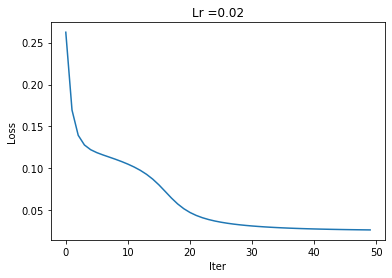

In [19]:
from NeuronalNetwork import *
nn = NeuronalNetwork(x_train,y_train,0.02,[100,25,1],0.95)
nn.gradient_descent_regu(5000)#gradient descent algorithm

Acc: 0.9664102564102561


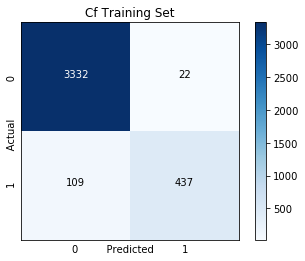

Acc: 0.9593301435406696


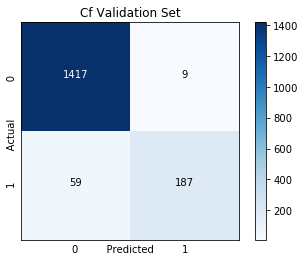

In [28]:
nn.threshold=0.5
nn.X,nn.Y=x_train, y_train 
target= nn.Y
predicted=nn.predict(x_train,y_train)
plotCf(target,predicted[0],'Cf Training Set')
nn.X,nn.Y=x_test, y_test 
target= nn.Y
predicted=nn.predict(x_test,y_test)
plotCf(target,predicted[0],'Cf Validation Set')

## Neural Network [100-50-1]

Cost after iteration 0: 0.243691
Cost after iteration 100: 0.151745
Cost after iteration 200: 0.128713
Cost after iteration 300: 0.120036
Cost after iteration 400: 0.115024
Cost after iteration 500: 0.111031
Cost after iteration 600: 0.107198
Cost after iteration 700: 0.103170
Cost after iteration 800: 0.098765
Cost after iteration 900: 0.093894
Cost after iteration 1000: 0.088541
Cost after iteration 1100: 0.082792
Cost after iteration 1200: 0.076840
Cost after iteration 1300: 0.070948
Cost after iteration 1400: 0.065383
Cost after iteration 1500: 0.060338
Cost after iteration 1600: 0.055911
Cost after iteration 1700: 0.052112
Cost after iteration 1800: 0.048895
Cost after iteration 1900: 0.046185
Cost after iteration 2000: 0.043902
Cost after iteration 2100: 0.041970
Cost after iteration 2200: 0.040325
Cost after iteration 2300: 0.038913
Cost after iteration 2400: 0.037692
Cost after iteration 2500: 0.036629
Cost after iteration 2600: 0.035695
Cost after iteration 2700: 0.034869
Cost

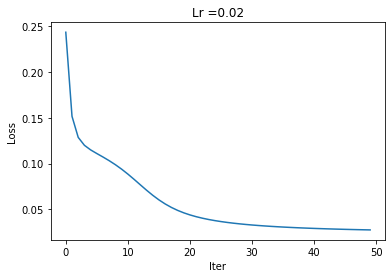

In [24]:
from NeuronalNetwork import *
nn = NeuronalNetwork(x_train,y_train,0.02,[100,50,1],0.95)
nn.gradient_descent_regu(5000)#gradient descent algorithm

Acc: 0.9658974358974355


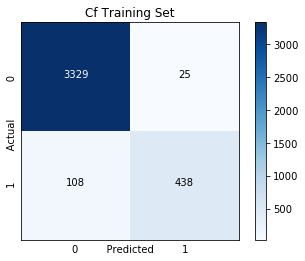

Acc: 0.9539473684210524


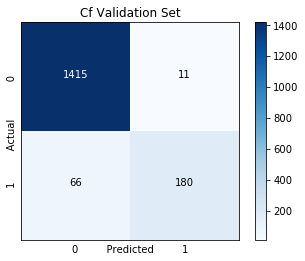

In [25]:
nn.threshold=0.5
nn.X,nn.Y=x_train, y_train 
target= nn.Y
predicted=nn.predict(x_train,y_train)
plotCf(target,predicted[0],'Cf Training Set')
nn.X,nn.Y=x_test, y_test 
target= nn.Y
predicted=nn.predict(x_test,y_test)
plotCf(target,predicted[0],'Cf Validation Set')

## Neural Network [100-75-1]

Cost after iteration 0: 0.265975
Cost after iteration 100: 0.146557
Cost after iteration 200: 0.121038
Cost after iteration 300: 0.111166
Cost after iteration 400: 0.104660
Cost after iteration 500: 0.098938
Cost after iteration 600: 0.093330
Cost after iteration 700: 0.087676
Cost after iteration 800: 0.082001
Cost after iteration 900: 0.076402
Cost after iteration 1000: 0.071009
Cost after iteration 1100: 0.065949
Cost after iteration 1200: 0.061322
Cost after iteration 1300: 0.057186
Cost after iteration 1400: 0.053553
Cost after iteration 1500: 0.050404
Cost after iteration 1600: 0.047695
Cost after iteration 1700: 0.045373
Cost after iteration 1800: 0.043381
Cost after iteration 1900: 0.041669
Cost after iteration 2000: 0.040189
Cost after iteration 2100: 0.038902
Cost after iteration 2200: 0.037775
Cost after iteration 2300: 0.036782
Cost after iteration 2400: 0.035901
Cost after iteration 2500: 0.035115
Cost after iteration 2600: 0.034411
Cost after iteration 2700: 0.033776
Cost

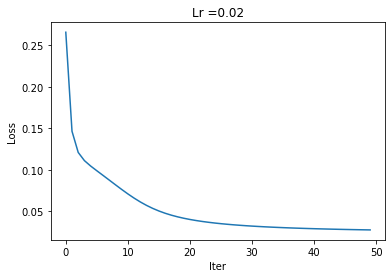

In [26]:
from NeuronalNetwork import *
nn = NeuronalNetwork(x_train,y_train,0.02,[100,75,1],0.95)
nn.gradient_descent_regu(5000)#gradient descent algorith

Acc: 0.9664102564102561


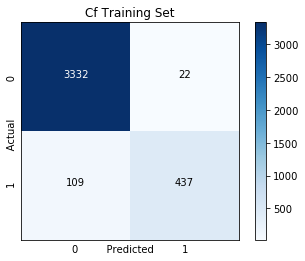

Acc: 0.9593301435406696


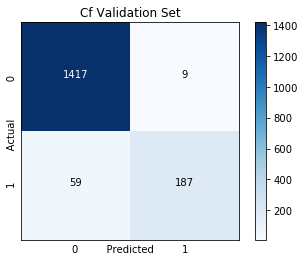

In [27]:
nn.threshold=0.5
nn.X,nn.Y=x_train, y_train 
target= nn.Y
predicted=nn.predict(x_train,y_train)
plotCf(target,predicted[0],'Cf Training Set')
nn.X,nn.Y=x_test, y_test 
target= nn.Y
predicted=nn.predict(x_test,y_test)
plotCf(target,predicted[0],'Cf Validation Set')